In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os

In [3]:
ls

Dataset.zip  sample_data/


In [4]:
import zipfile
with zipfile.ZipFile('Dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [5]:
data = []
labels = []

In [6]:
paths_list = list(paths.list_images('./Dataset'))
paths_list[0:10]

['./Dataset/NB/128.jpg',
 './Dataset/NB/233.jpg',
 './Dataset/NB/480.jpg',
 './Dataset/NB/115.jpg',
 './Dataset/NB/324.jpg',
 './Dataset/NB/704.jpg',
 './Dataset/NB/394.jpg',
 './Dataset/NB/189.jpg',
 './Dataset/NB/416.jpg',
 './Dataset/NB/415.jpg']

In [7]:
label = paths_list[0].split('/')[-2]
label

'NB'

In [8]:
for i in paths_list:
    
    
    label = i.split('/')[-2]
    
    image = cv2.imread(i)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    
    data.append(image)
    
    labels.append(label)

In [9]:

data = np.array(data)/255.0
labels = np.array(labels)

In [10]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [11]:
mygen = ImageDataGenerator(rotation_range=15,
                           fill_mode="nearest",
                           horizontal_flip = True,
                          )

In [12]:
base = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))

58892288/58889256 [==============================] - 0s 0us/step


In [13]:
base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [14]:
from tensorflow.keras.layers import MaxPooling2D

In [25]:
top = base.output
top = AveragePooling2D(pool_size=(4, 4))(top)
top = Flatten(name="flatten")(top)
top = Dropout(0.5)(top)
top = Dense(64, activation="relu")(top)
top = Dense(32, activation="relu")(top)
top = Dense(2, activation="softmax")(top)

In [26]:
model = Model(inputs = base.input, outputs=top)

In [27]:
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [28]:
for i in base.layers:
    i.trainable = False

In [29]:

int_lr = 1e-3
epoch = 25
bs= 8

In [30]:
adm = Adam(lr=int_lr, decay=int_lr / epoch)

In [31]:
model.compile(loss="binary_crossentropy", optimizer=adm,metrics=["accuracy"])

In [32]:
labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [33]:
(trainX, testX, trainY, testY) = train_test_split(data, labels,test_size=0.20, stratify=labels, random_state=42)

In [34]:
fit_model = model.fit_generator(mygen.flow(trainX, trainY, batch_size=bs),
                        steps_per_epoch=len(trainX) // bs,
                        validation_data=(testX, testY),
                        validation_steps=len(testX) // bs,
                        epochs=epoch)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
129/129 [==============================] - 14s 104ms/step - loss: 0.6835 - accuracy: 0.5792 - val_loss: 0.6779 - val_accuracy: 0.5714
Epoch 2/25
129/129 [==============================] - 12s 90ms/step - loss: 0.6553 - accuracy: 0.6260
Epoch 3/25
129/129 [==============================] - 12s 91ms/step - loss: 0.6040 - accuracy: 0.6616
Epoch 4/25
129/129 [==============================] - 12s 90ms/step - loss: 0.5671 - accuracy: 0.7213
Epoch 5/25
129/129 [==============================] - 12s 90ms/step - loss: 0.5862 - accuracy: 0.6830
Epoch 6/25
129/129 [==============================] - 12s 90ms/step - loss: 0.5629 - accuracy: 0.7039
Epoch 7/25
129/129 [==============================] - 12s 90ms/step - loss: 0.5382 - accuracy: 0.7365
Epoch 8/25
129/129 [==============================] - 12s 91ms/step - loss: 0.5551 - accuracy: 0.7120
Epoch 9/25
129/129 [==============================] - 12s 90ms/step - loss: 0.5514 - accuracy: 0.7106
Epoch 10/25
129/129 [==================

In [35]:
predIdxs = model.predict(testX, batch_size=bs)

In [36]:
predId = np.argmax(predIdxs, axis=1)

In [37]:
print(classification_report(testY.argmax(axis=1), predId,
	target_names=lb.classes_))

              precision    recall  f1-score   support

           B       0.62      0.82      0.71       105
          NB       0.84      0.66      0.74       154

    accuracy                           0.73       259
   macro avg       0.73      0.74      0.72       259
weighted avg       0.75      0.73      0.73       259



In [38]:
c_m = confusion_matrix(testY.argmax(axis=1), predId)

In [39]:
total = sum(sum(c_m))
acc = (c_m[0, 0] + c_m[1, 1]) / total
sensitivity = c_m[0, 0] / (c_m[0, 0] + c_m[0, 1])
specificity = c_m[1, 1] / (c_m[1, 0] + c_m[1, 1])
print(c_m)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[ 86  19]
 [ 52 102]]
acc: 0.7259
sensitivity: 0.8190
specificity: 0.6623


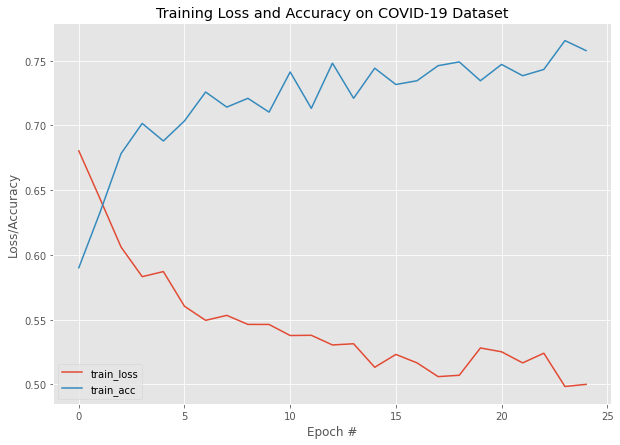

In [41]:
N = epoch
plt.style.use("ggplot")
plt.rcParams["figure.figsize"]=10,7
plt.figure()
plt.plot(np.arange(0, N), fit_model.history["loss"], label="train_loss")
#plt.plot(np.arange(0, N), fit_model.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), fit_model.history["accuracy"], label="train_acc")
#plt.plot(np.arange(0, N), fit_model.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("figure")

In [42]:

model.save('buddha_classification.h5')

In [43]:
model.save('classification.h5')